In [12]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os

%matplotlib inline

Using hadd.sh, we merged all of these files together into one output, which we will run through now:

In [13]:
f = r.TFile("../v9_10_00/results_histOnly_v9_10_00.root") #processed output of hadd.sh

prodString="v9_10_00"

In [14]:
f.cd("farline/calo1")
#f.ls()

True

Print all of the embedded histograms.

964,240,158 Entries in these histograms
75,774,509 Entries in these histograms
964,240,158 Entries in these histograms
17,688,373 Entries in these histograms


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/v9_10_00/v9_10_00_farlineHistograms.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_10_00/v9_10_00_farlineHistograms.root has been created


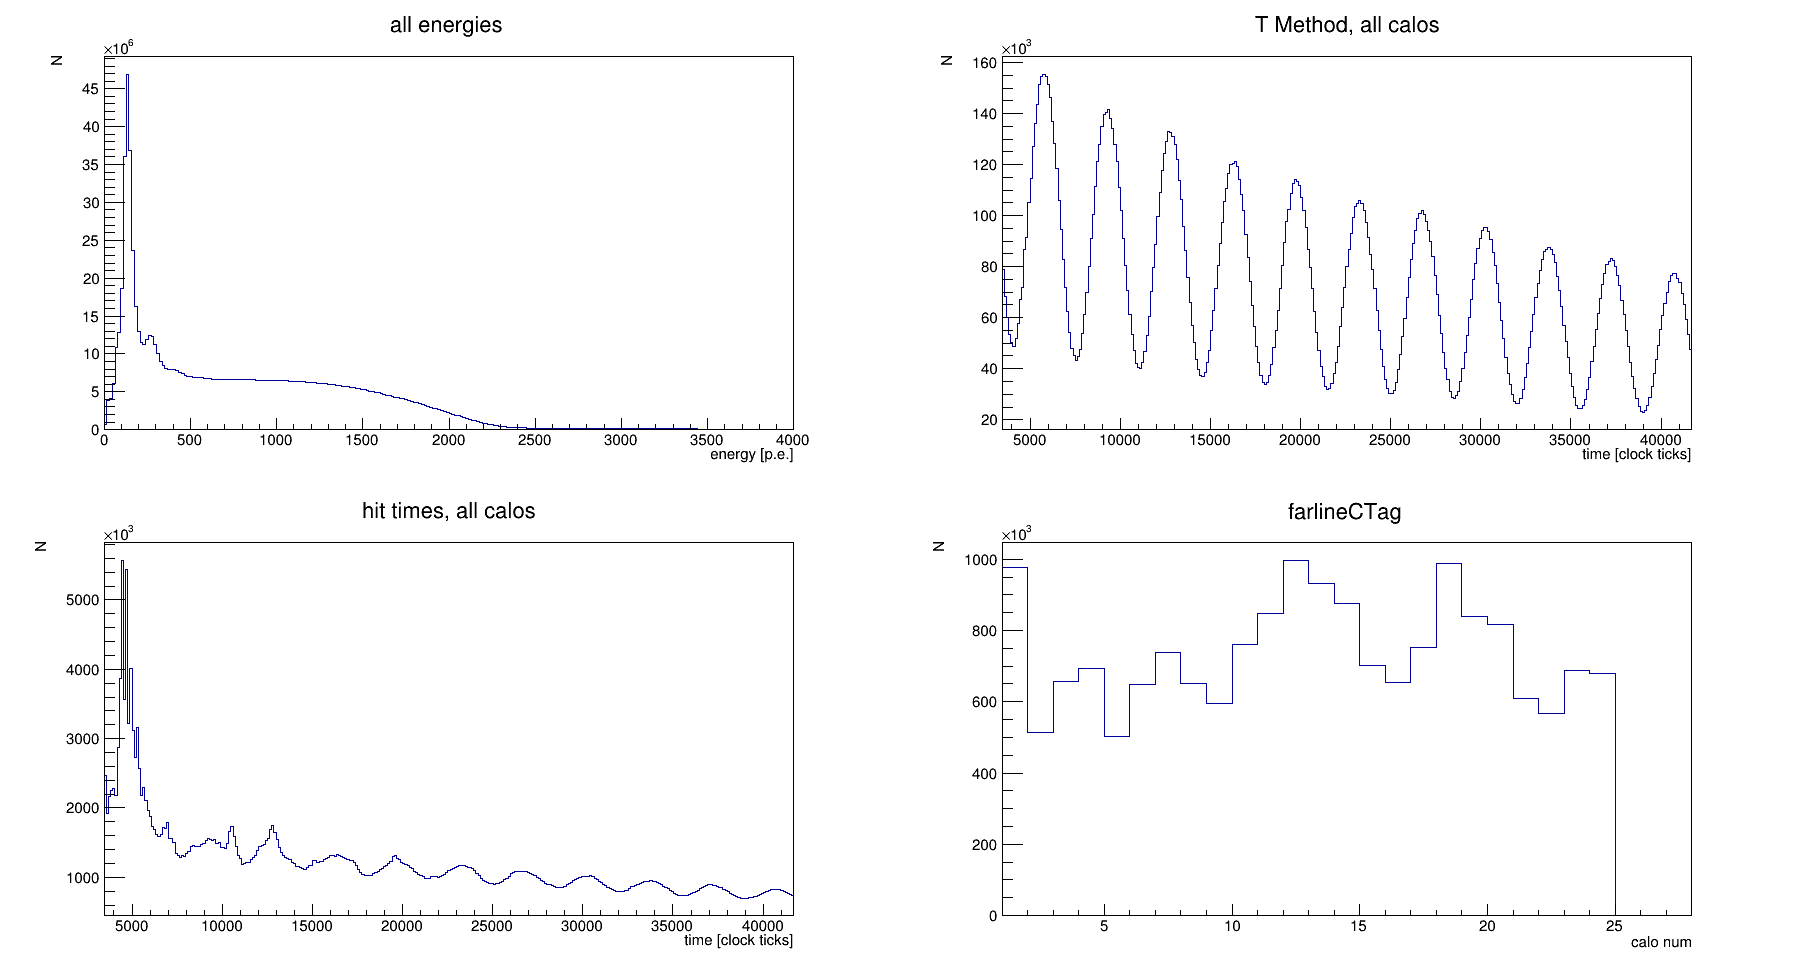

In [15]:
c = r.TCanvas("c","c",1800,1000)
c.Divide(2,2)
c.cd(1)
allCaloEnergies = f.Get("farline").Get("allCaloEnergies").Clone()
allCaloEnergies.Draw()
c.Draw()

c.cd(2)
allCaloWiggle = f.Get("farline").Get("allCaloWiggle").Clone()
allCaloWiggle.Draw()
allCaloWiggle.GetXaxis().SetRange(30,350)

c.cd(3)
allCaloTimes = f.Get("farline").Get("allCaloTimes").Clone()
allCaloTimes.GetXaxis().SetRange(30,350)
allCaloTimes.Draw()

c.cd(4)
farlineCtag = f.Get("farline").Get("farlineCTag").Clone()
farlineCtag.Draw()

c.Draw()
c.Print("./images/"+prodString+"/"+prodString+"_farlineHistograms.png")
c.Print("./images/"+prodString+"/"+prodString+"_farlineHistograms.root")

print("{:,}".format(int(allCaloEnergies.GetEntries())), "Entries in these histograms")
print("{:,}".format(int(allCaloWiggle.GetEntries())), "Entries in these histograms")
print("{:,}".format(int(allCaloTimes.GetEntries())), "Entries in these histograms")
print("{:,}".format(int(farlineCtag.GetEntries())), "Entries in these histograms")

In [16]:
print(allCaloWiggle.GetNbinsX())

4700


# Now lets make a wiggle plot of all of the calos

In [17]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [18]:
func = r.TF1("func", blinded_wiggle, 30,600,5)
func.SetParNames('N','#tau','A','R','#phi')
func.SetParameters(700000,64.4,0.4,0,0)
func.SetParLimits(4,-0.001 - 2*math.pi,2*math.pi+0.001)
func.SetLineColor(2)
func.SetNpx(2000)

### Five parameter fit

0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
 FCN=5496.24 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         484 TOTAL
                     EDM=5.19287e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            1.09930e+05   3.65455e+01  -6.27854e-03  -5.99332e-11
   2  #tau         6.37408e+01   1.19434e-02   7.18913e-07  -1.79381e-05
   3  A            5.60516e-01   2.26396e-04  -3.78285e-08   3.90611e-05
   4  R           -8.67110e+00   4.85216e+00  -3.17500e-04   3.35626e-08
   5  #phi        -1.05657e+00   7.90173e-04   7.90173e-04   5.04442e-03
 FCN=5496.24 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         283 TOTAL
                     EDM=2.4397e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZ

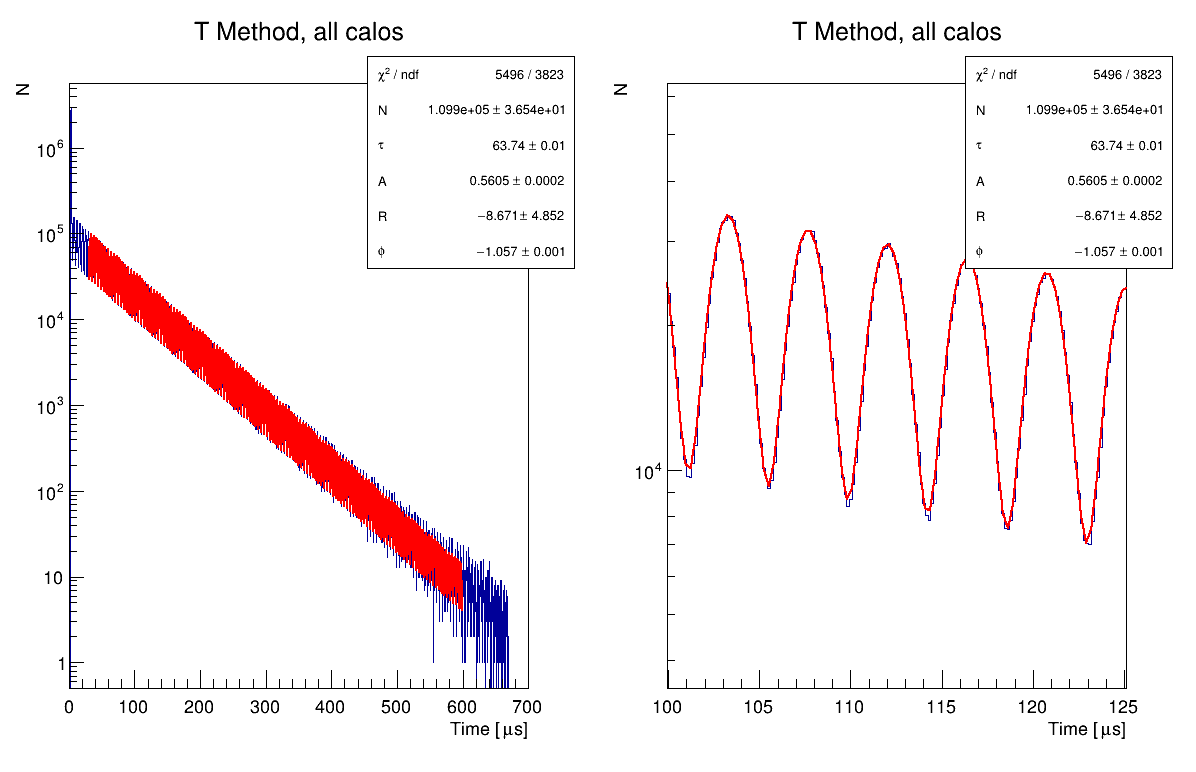

In [19]:
c2 = r.TCanvas("c2","c2",1200,800)
c2.Divide(2,1)
c2.cd(1)
r.gPad.SetLogy()

r.gStyle.SetOptFit(111)
allCaloWiggle = f.Get("farline").Get("allCaloWiggle").Clone()

print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

residuals = allCaloWiggle.Clone() # this will be filled with the fit residuals later

for fit in range(2):
    print("Sarting fit:", fit+1)
    allCaloWiggle.Fit("func","REM")

    
chiSqAll = ( ( func.GetNDF(),
              func.GetChisquare(),
              func.GetProb() ) )
    
allCaloWiggle.Draw()

c2.cd(2)
ding =  allCaloWiggle.Clone()
ding.GetXaxis().SetRangeUser(100,125)
ding.Draw()

r.gPad.SetLogy()
c2.Draw()

Info in <TCanvas::Print>: png file ./images/v9_10_00/v9_10_00_TmethodWiggleFitAllCalos.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_10_00/v9_10_00_TmethodWiggleFitAllCalos.root has been created


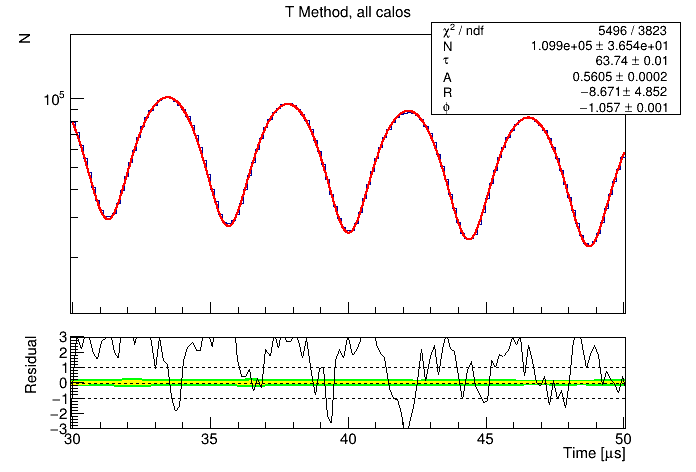

In [20]:
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
c3 = r.TCanvas()
allCaloWiggle.Draw()
c3.SetLogy()
c3.Draw()

rp1 = r.TRatioPlot(allCaloWiggle)
rp1.Draw()
rp1.GetLowerRefYaxis().SetTitle("Residual")
rp1.GetLowerRefYaxis().SetRangeUser(-3,3)

allCaloWiggle.GetXaxis().SetRangeUser(30,50)

c3.Update()
c3.Draw()
c3.Print("./images/"+prodString+"/"+prodString+"_TmethodWiggleFitAllCalos.png")
c3.Print("./images/"+prodString+"/"+prodString+"_TmethodWiggleFitAllCalos.root")

### Fourier transform of the 5-parameter residuals.

4700
3828 [(30.010638297872337, 196.24346803191293), (30.159574468085104, 845.8118308412813), (30.30851063829787, 547.7340845877989), (30.457446808510635, 766.6299726236102), (30.606382978723403, 644.2849180766789)]
3828 569.9787234042552 29.93618966628871 599.9149130705439
0.1488972631672558 0.0017544514539549819
13.43208033147934 6.71604016573967


Info in <TCanvas::Print>: png file ./images/v9_10_00/v9_10_00_5ParamResiduals.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_10_00/v9_10_00_5ParamResiduals.root has been created


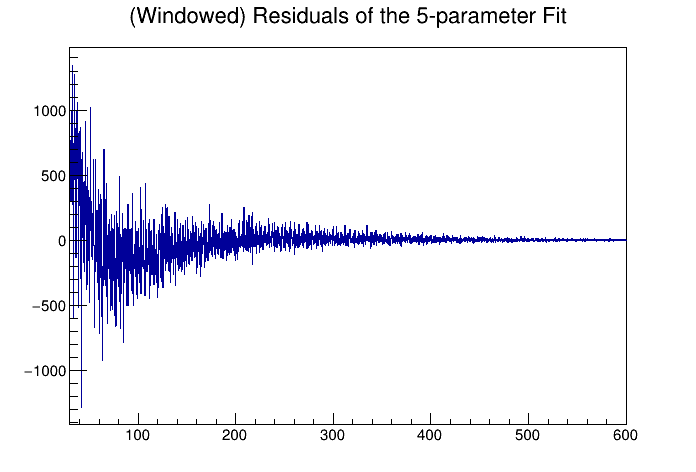

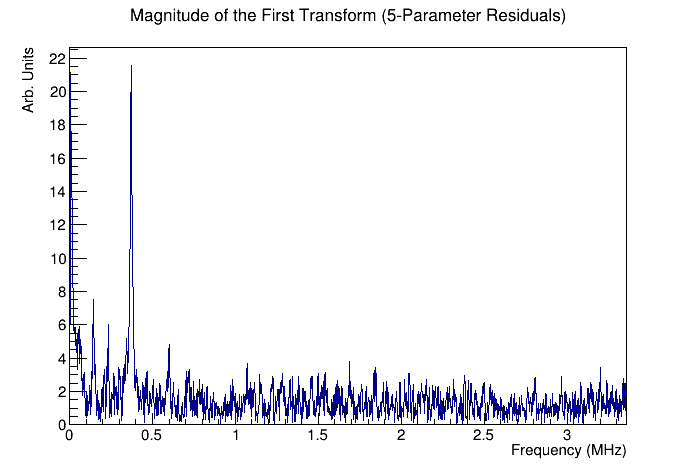

In [21]:
c3 = r.TCanvas()
residuals5param = residuals.Clone() # this will hold the residials from the 5-parameter fit
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow
print(nBins)
residVec = []
for i in range(nBins):
    binCenterX = allCaloWiggle.GetXaxis().GetBinCenter(i)
    if (binCenterX > 30 and binCenterX < 600):
        residVec.append( (binCenterX, allCaloWiggle.GetBinContent(i) - func.Eval(binCenterX) ) )
        residuals5param.SetBinContent(i, allCaloWiggle.GetBinContent(i) - func.Eval(binCenterX))
    else:
        residuals5param.SetBinContent(i, 0)

print(len(residVec),[residVec[i] for i in range(5)])
centers, bins = zip(*residVec)
htest = r.TH1D("htest","htest",len(residVec),centers[0],centers[len(residVec)-1])
for i,ding in enumerate(bins):
    htest.SetBinContent(i, ding)
    
residuals5param.Delete()
residuals5param = htest
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow

#apply a windows function to try to get rid of the imaginary peaks
welchVec = []
for i in range(nBins):
    unwindowed = residuals5param.GetBinContent(i)
    welch = 1 #- ( ( i - (nBins - 1) / 2) / ((nBins - 1) / 2) )**2
    welchVec.append(welch)
    residuals5param.SetBinContent(i, unwindowed *  welch)
    
residuals5param.Draw()
residuals5param.GetXaxis().SetRangeUser(30,700)
residuals5param.SetTitle("(Windowed) Residuals of the 5-parameter Fit")
c3.Draw()    
    
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = residuals5param.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (5-Parameter Residuals)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/normXform)
c2 = r.TCanvas()
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = residuals5param.GetSize() - 2
minBinCenter = residuals5param.GetXaxis().GetBinCenter(0)
maxBinCenter = residuals5param.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10.0,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
#hxform.GetXaxis().SetLimits(0,limmax)
nbins = residuals5param.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
#hxform.GetXaxis().SetRangeUser(0,1.4)

residuals5paramXform = hxform.Clone()

#c2.SetLogy()
c2.Draw()
c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.png")
c2.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals.root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/v9_10_00/v9_10_00_5ParamResiduals_WithFits.png has been created
Info in <TCanvas::SaveAs>: ROOT file ./images/v9_10_00/v9_10_00_5ParamResiduals_WithFits.root has been created


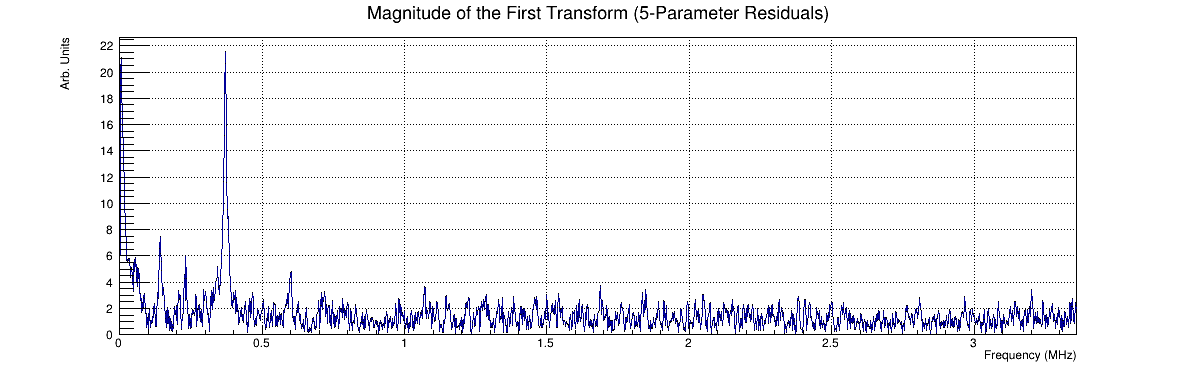

In [22]:
c = r.TCanvas("c","c",1200,400)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)
hxform.Draw("HIST P0 L")

c.Draw()
c.SetGrid()
c.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals_WithFits.png")
c.Print("./images/"+prodString+"/"+prodString+"_5ParamResiduals_WithFits.root")

double check the root fft result with the python fft module

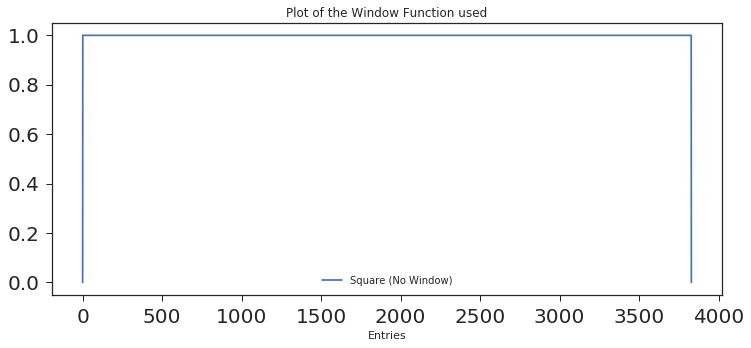

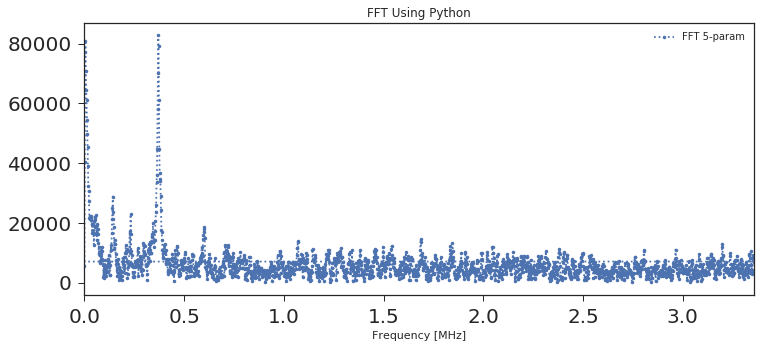

In [23]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot([0]+welchVec+[0],label='Square (No Window)')
plt.title("Plot of the Window Function used")
plt.xlabel("Entries")
plt.legend()
plt.show()

ding = np.fft.fft(np.array(bins))

n = len(bins)
d = (centers[1] - centers[0])*math.pow(10.0,-6)

freq = np.fft.fftfreq(n, d)


fig, ax = plt.subplots(figsize=(12, 5))
plt.plot([x/(10**6) for x in freq],np.abs(ding),'.:',label='FFT 5-param')
plt.title("FFT Using Python")
plt.xlabel("Frequency [MHz]")
plt.xlim(0,6.7157787731503555 / 2)# *10.**6)
plt.legend()
plt.show()